In [42]:
#######################################################
# Created-Date: 04/14/2016                            #
# Last Modified: 04/27/2016                           #
# Created by: Himanshu Bharara                        #
#                                                     #
# Objective: Build an SVM model using training and    #
#            test data for each of the scenarios      #
#            on the principal components from PCA     #
#                                                     #
# Instruction before running:                         #
# 1. Please change the file path of directory         # 
# 2. change ranges based on the number of lyrics      # 
#    you have in the directory                        #  
# 3. Please follow similar nomenclature as used in the# 
#    code                                             #
# 4. Please use the array list of only the years      #
#    under consideration and comment the rest         #
# 5. Please use the scenario definition to assign 0's #
#    to the relevant subset of the super set          #
#######################################################




import pandas as pd
import matplotlib.pyplot as plt
import pandas.io.data
from statsmodels import regression
import math
import statsmodels.api as sm
import datetime
import numpy as np

dhome = "/Users/HimanshuBharara/Documents/CU-Sem2/IEORE4571/Projects/Datasets/songs"
year = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
#year = ['2030','2020']
## Adding 1's to 2020 Dataset
filepath = dhome+year[0]+".csv"
df=pd.read_csv(filepath)
grades = []
for row in df['ranks']:
    if  row <= 20:
        grades.append(1)
    else:
        grades.append(0)
df['grades'] = grades


## Adding 0's to 2030 Dataset
#filepath = dhome+year[11]+".csv"
#df1=pd.read_csv(filepath)
#grades = []
#for row in df1['ranks']:
#    if  row <= 103:
#        grades.append(0)
#    else:
#        grades.append(1)
#df1['grades'] = grades

#df = df.append(df1)



## Adding 0's to Remaining Dataset
for i in range(1,10):
    filepath = dhome+year[i]+".csv"
    mds = pd.read_csv(filepath,header=0)
    grades = []
    for row in mds['ranks']:
        if  row <= 20:
            grades.append(1)
        else:
            grades.append(0)
    mds['grades'] = grades
    df = df.append(mds)

print(df.shape)
#print(list(df.columns.values))

## Drop Duplicates
od = df.sort(['songs','artists'], ascending=[1,0])
ot=od.drop_duplicates(['songs','artists'], keep='first')
print(ot.shape)
ot.pop('ranks')
ot.pop('ids')
ot.pop('artists')
ot.pop('songs')
#ot['grades'].value_counts()
pd.DataFrame(ot.describe()).to_csv("/Users/HimanshuBharara/Documents/CU-Sem2/IEORE4571/Projects/SummaryStatistics.csv")

(1000, 23)
(909, 23)


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:57: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [43]:
# Split the model into training and test set
from sklearn.cross_validation import train_test_split
df_train,df_test = train_test_split(ot,random_state=1)

print(df_train.shape)
print(df_test.shape)
print(list(df_train.columns.values))

(681, 19)
(228, 19)
['acousticness', 'danceability', 'duration', 'energy', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'Anger', 'Surprise', 'Joy', 'Sadness', 'Love', 'Fear', 'grades']


In [ ]:
## This code cretes a plot of 15X15 plots of all the features in the dataset to develop the intuition for running PCA 
## and feature selection

import seaborn as sms
acoustics_var = ['acousticness','danceability','duration','energy','key','liveness','loudness','mode','speechiness','tempo',
        'time_signature','valence','Anger','Surprise','Joy','Sadness','Love','Fear']
lyrics_var = ['acousticness','danceability','duration','energy','key','liveness','loudness','mode','speechiness','tempo',
        'time_signature','valence','Anger','Surprise','Joy','Sadness','Love','Fear']

plotdir = "/Users/HimanshuBharara/Documents/CU-Sem2/IEORE4571/Projects/PCA/Plots/Scenario5/"
for var1 in acoustics_var:
    for var2 in lyrics_var:
        if var1 != var2:
            sms_plot=sms.pairplot(df_train,x_vars=var2,
                    y_vars=var1,
                    size=7,aspect=0.7,
                    hue="grades")
            sms_plot.savefig(plotdir+var1+"_"+var2+".png")

Everything ok!
Eigenvalues in descending order:
5.00307771837
2.2371036898
1.60433663006
1.31957773457
1.15050823704
1.08293851301
0.936576907593
0.826313167432
0.744268426951
0.694532469933
0.660731564565
0.518578551038
0.185992354619
0.0274953159658
0.00499516309852
0.00239362273378
0.000579933217778


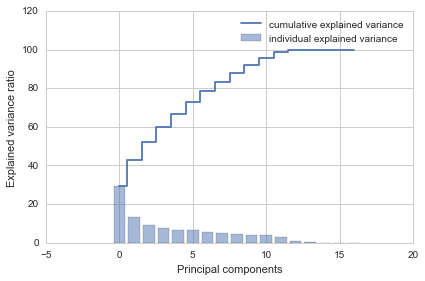

In [45]:


from sklearn.preprocessing import StandardScaler
import numpy as np

X = df_train.ix[:,0:17].values
y = df_train.ix[:,18].values

# Standardising
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
#print('Covariance matrix \n%s' %cov_mat)

# Eigen Decomposition Based on Covariance Matrix
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)


# Eigen Decomposition Based on Correlation Matrix
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

#Eigendecomposition of the raw data based on the correlation matrix
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)


# Testing the Length of Vectors Assuming All Vectors are of Length 1
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')




# In order to decide which eigenvector(s) can dropped without losing too much 
#information for the construction of lower-dimensional subspace, we need to inspect 
#the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about 
#the distribution of the data; those are the ones can be dropped.

#In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order 
#choose the top kk eigenvectors.


# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


    
#After sorting the eigenpairs, the next question is “how many principal components are 
#we going to choose for our new feature subspace?” 
#A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. 
#The explained variance tells us how much information (variance) can be attributed to each of the principal components.

import seaborn as sms
%matplotlib inline
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plotdir = "/Users/HimanshuBharara/Documents/CU-Sem2/IEORE4571/Projects/PCA/Plots/Scenario5"
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(17),var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(17), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig(plotdir+"PCA_Explained_Variance_Component_Wise.png")

In [46]:
# Projection Matrix
#It’s about time to get to the really interesting part: 
#The construction of the projection matrix that will be used to transform the Iris data 
#onto the new feature subspace. Although, the name “projection matrix” has a nice ring to it, 
#it is basically just a matrix of our concatenated top k eigenvectors.

#Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, 
#by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×kd×k-dimensional 
#eigenvector matrix WW.


## using 9 eigen vectors 
matrix_w = np.hstack((eig_pairs[0][1].reshape(17,1),
                      eig_pairs[1][1].reshape(17,1),
                      eig_pairs[2][1].reshape(17,1),
                      eig_pairs[3][1].reshape(17,1),
                      eig_pairs[4][1].reshape(17,1),
                      eig_pairs[5][1].reshape(17,1),
                      eig_pairs[6][1].reshape(17,1),
                      eig_pairs[7][1].reshape(17,1),
                      eig_pairs[8][1].reshape(17,1),
                      eig_pairs[9][1].reshape(17,1),
                     ),
                    )

#print('Matrix W:\n', matrix_w)

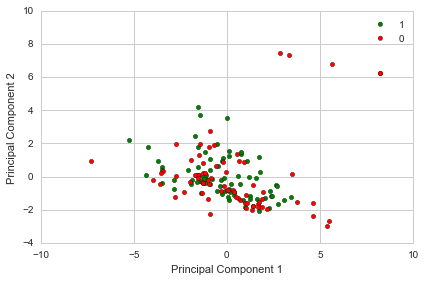

In [5]:
#Projection Onto the New Feature Space
#In this last step we will use the 4×24×2-dimensional projection matrix WW to transform our 
#samples onto the new subspace via the equation
#Y=X×WY=X×W, where YY is a 150×2150×2 matrix of our transformed samples.

Y = X_std.dot(matrix_w)
with plt.style.context('seaborn-whitegrid'):
    #plt.figure(figsize=(6, 4))
    for lab, col in zip((1, 0),
                        ('Green', 'Red')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    #plt.savefig(plotdir+"PCA_Component_Analysis.png")

In [47]:
#print(eig_pairs[10][1])
Y = X_std.dot(matrix_w)
print(Y.shape)

(681, 10)


In [48]:
# Applying PCA Decomposition to the Final Modelling DataSet
from sklearn import decomposition
odir = "/Users/HimanshuBharara/Documents/CU-Sem2/IEORE4571/Projects/PCA/"
pca = decomposition.PCA()
pca.n_components = 10
train_reduced = pca.fit_transform(df_train)
test_reduced = pca.transform(df_test)
#pd.DataFrame(train_reduced).to_csv("/Users/HimanshuBharara/Documents/CU-Sem2/IEORE4571/Projects/PCA/train_reduced.csv")
#pd.DataFrame(test_reduced).to_csv("/Users/HimanshuBharara/Documents/CU-Sem2/IEORE4571/Projects/PCA/test_reduced.csv")

In [49]:
# Training the model based on the components selected from PCA
y = df_train['grades']
df_train.pop('grades')
from sklearn import svm
clf = svm.SVC()
clf.fit(train_reduced,y)

# Testing the trained model based on the components selected from PCA
z = df_test['grades']
df_test.pop('grades')
from sklearn.metrics import accuracy_score
print(accuracy_score(clf.predict(test_reduced),z))
print(clf.n_support_)
print(clf.support_vectors_)
print(clf.intercept_)

0.815789473684
[535 142]
[[  4.93128081e+01   3.39123203e+01   9.75425537e+00 ...,   7.69650433e-02
   -2.59064293e-01   8.07381157e-02]
 [  1.14250457e+01   6.27999258e+00  -2.97908626e+00 ...,  -1.01123450e-01
   -3.68559268e-01   6.64134204e-02]
 [ -4.18501190e+01   1.91836663e+01  -3.30991309e+00 ...,   1.27294802e-01
    2.05154350e-01   1.31531970e-01]
 ..., 
 [  1.52376040e+01   2.42296925e+01  -4.75105810e+00 ...,  -3.19765664e-02
    3.22854277e-01   2.02187231e-01]
 [  2.61550520e+01   3.18453652e+00  -2.35491810e+00 ...,  -9.21130632e-02
   -1.57002295e-01   1.10419609e-01]
 [  1.12016400e+01  -1.64567402e+01   6.12753426e-01 ...,  -6.23360945e-02
    2.32716045e-02   1.76406678e-02]]
[-0.75144161]
